In [2]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

# Import dataset csv
df_dataset= pd.read_excel("mypertaminadata.xlsx")
df_dataset.head()

,text,Sentimen
0,"23:29:56,""Semoga aplikasinya cepat diperbaiki,...",1
1,"23:31:43,Aplikasi apa ini nik tidak terbaca",1
2,"23:41:43,Ntah laah susah di jelaskan....ribeet…",0
3,"23:45:23,Selevel negara kok g mampu bikin apli...",0
4,"00:00:53,""Maaf kasih 1 bntng karna ga epektif...",0


In [3]:
# Cleansing dataset
df_dataset['text'] = df_dataset['text'].apply(lambda x: re.sub('(<.*?>)', ' ', x))
df_dataset['text'] = df_dataset['text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))  
df_dataset['text'] = df_dataset['text'].apply(lambda x: x.strip())
df_dataset['text'] = df_dataset['text'].apply(lambda x: re.sub('[^a-zA-Z"]',' ',x))
# Contoh data pertama yg dicleansing
df_dataset['text'][0]

'      Semoga aplikasinya cepat diperbaiki karena begitu banyak masalah saat menggunakan aplikasi ini aplikasi ini setidaknya jangan membuat kami tambah susahkarena kami udah sangat susah'

In [4]:
# Dataset Casefolding
df_dataset['text'] = df_dataset['text'].apply(lambda x: x.lower())
# Contoh data pertama yg dicasefolding
df_dataset['text'][0]

'      semoga aplikasinya cepat diperbaiki karena begitu banyak masalah saat menggunakan aplikasi ini aplikasi ini setidaknya jangan membuat kami tambah susahkarena kami udah sangat susah'

In [5]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 6.1 MB/s eta 0:00:00


In [6]:
# Steeming dataset

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df_dataset['steemed'] = None
for i in range (len(df_dataset['text'])):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(df_dataset['text'][i])
    df_dataset['steemed'][i] = text
    print(i, end = ' ')

<ipython-input-6-8c89bb5ca359>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['steemed'][i] = text


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 

In [7]:
# Contoh data pertama yg disteeming
df_dataset['steemed'][0]

'moga aplikasi cepat baik karena begitu banyak masalah saat guna aplikasi ini aplikasi ini tidak jangan buat kami tambah susahkarena kami udah sangat susah'

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# Proses tokeninzing
data = []
for i in range (len(df_dataset['steemed'])):
    steemed = word_tokenize(df_dataset['steemed'][i])
    data.append(steemed)

# Contoh data pertama yang ditokenizing
data[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['moga',
 'aplikasi',
 'cepat',
 'baik',
 'karena',
 'begitu',
 'banyak',
 'masalah',
 'saat',
 'guna',
 'aplikasi',
 'ini',
 'aplikasi',
 'ini',
 'tidak',
 'jangan',
 'buat',
 'kami',
 'tambah',
 'susahkarena',
 'kami',
 'udah',
 'sangat',
 'susah']

In [9]:
# Data stopwords
text_file = open("stopwords-id.txt", "r")
lines = text_file.readlines()
stopwords = []
for sub in lines:
    stopwords.append(sub.replace("\n", ""))

In [10]:
# Proses penghapusan stopwords
quote_without_stopwords_arr = []

for i in range(len(df_dataset['steemed'])):
    quote_without_stopwords = []
    for word in data[i]:
        if word.casefold() not in stopwords:
            quote_without_stopwords.append(word)
    quote_without_stopwords_arr.append(quote_without_stopwords)

# Contoh data pertama yang dihapus stopwordsnya
quote_without_stopwords_arr[0]

['moga',
 'aplikasi',
 'cepat',
 'aplikasi',
 'aplikasi',
 'susahkarena',
 'udah',
 'susah']

In [11]:
# Masukkan data yang sudah dihapus stopwordnya & dijadikan list ke dalam dataframe
df_dataset['stoppedword'] = None
df_dataset['text_list'] = None
for i in range(len(df_dataset['text'])):
    df_dataset['stoppedword'][i] = ' '.join(quote_without_stopwords_arr[i])
    df_dataset['text_list'][i] = quote_without_stopwords_arr[i]

<ipython-input-11-597af64377b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['stoppedword'][i] = ' '.join(quote_without_stopwords_arr[i])
<ipython-input-11-597af64377b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['text_list'][i] = quote_without_stopwords_arr[i]


In [12]:
df_dataset.head()

,text,Sentimen,steemed,stoppedword,text_list
0,semoga aplikasinya cepat diperbaiki kare...,1,moga aplikasi cepat baik karena begitu banyak ...,moga aplikasi cepat aplikasi aplikasi susahkar...,"[moga, aplikasi, cepat, aplikasi, aplikasi, su..."
1,aplikasi apa ini nik tidak terbaca,1,aplikasi apa ini nik tidak baca,aplikasi nik baca,"[aplikasi, nik, baca]"
2,ntah laah susah di jelaskanribeet,0,ntah laah susah di jelaskanribeet,ntah laah susah jelaskanribeet,"[ntah, laah, susah, jelaskanribeet]"
3,selevel negara kok g mampu bikin aplikas...,0,level negara kok g mampu bikin aplikasi yg bai...,level negara g bikin aplikasi yg udah dftr ula...,"[level, negara, g, bikin, aplikasi, yg, udah, ..."
4,maaf kasih bntng karna ga epektif mala...,0,maaf kasih bntng karna ga epektif malah tambah...,maaf kasih bntng karna ga epektif ribet daftar...,"[maaf, kasih, bntng, karna, ga, epektif, ribet..."


In [13]:
# Fungsi hitung nilai TF
def calc_tf(document):
    tf_dict = {}
    for term in document:
        if term in tf_dict:
            tf_dict[term] += 1
        else:
            tf_dict[term] = 1
            
    for term in tf_dict:
        tf_dict[term] = tf_dict[term] / len(document)
    return tf_dict

df_dataset["tf_dict"] = df_dataset['text_list'].apply(calc_tf)

In [14]:
# Fungsi hitung nilai DF
def calc_df(tfDict):
    count_df = {}
    for document in tfDict:
        for term in document:
            if term in count_df:
                count_df[term] += 1
            else:
                count_df[term] = 1
    return count_df

df = calc_df(quote_without_stopwords_arr)

In [15]:
import numpy as np

# Fungsi hitung nilai IDF

n_document = len(df_dataset)

def calc_idf(n_document, df):
    idf_Dict = {}
    for term in df:
        idf_Dict[term] = np.log(n_document / (df[term] + 1))
    return idf_Dict
  
idf = calc_idf(n_document, df)

In [16]:
# Hitung nilai TH-IDF

def calc_tf_idf(tf):
    tf_idf_Dict = {}
    for key in tf:
        tf_idf_Dict[key] = tf[key] * idf[key]
    return tf_idf_Dict

df_dataset["tf_idf_dict"] = df_dataset["tf_dict"].apply(calc_tf_idf)

In [17]:
df_dataset.head()

,text,Sentimen,steemed,stoppedword,text_list,tf_dict,tf_idf_dict
0,semoga aplikasinya cepat diperbaiki kare...,1,moga aplikasi cepat baik karena begitu banyak ...,moga aplikasi cepat aplikasi aplikasi susahkar...,"[moga, aplikasi, cepat, aplikasi, aplikasi, su...","{'moga': 0.125, 'aplikasi': 0.375, 'cepat': 0....","{'moga': 0.37956928350928076, 'aplikasi': 0.22..."
1,aplikasi apa ini nik tidak terbaca,1,aplikasi apa ini nik tidak baca,aplikasi nik baca,"[aplikasi, nik, baca]","{'aplikasi': 0.3333333333333333, 'nik': 0.3333...","{'aplikasi': 0.20293534404206476, 'nik': 1.108..."
2,ntah laah susah di jelaskanribeet,0,ntah laah susah di jelaskanribeet,ntah laah susah jelaskanribeet,"[ntah, laah, susah, jelaskanribeet]","{'ntah': 0.25, 'laah': 0.25, 'susah': 0.25, 'j...","{'ntah': 1.2070784343255754, 'laah': 1.2070784..."
3,selevel negara kok g mampu bikin aplikas...,0,level negara kok g mampu bikin aplikasi yg bai...,level negara g bikin aplikasi yg udah dftr ula...,"[level, negara, g, bikin, aplikasi, yg, udah, ...","{'level': 0.037037037037037035, 'negara': 0.07...","{'level': 0.17882643471490003, 'negara': 0.306..."
4,maaf kasih bntng karna ga epektif mala...,0,maaf kasih bntng karna ga epektif malah tambah...,maaf kasih bntng karna ga epektif ribet daftar...,"[maaf, kasih, bntng, karna, ga, epektif, ribet...","{'maaf': 0.1, 'kasih': 0.1, 'bntng': 0.1, 'kar...","{'maaf': 0.48283137373023016, 'kasih': 0.27488..."


In [18]:
feature = 25
sorted_df = sorted(df.items(), key=lambda kv: kv[1], reverse=True)[:feature]

unique_term = [item[0] for item in sorted_df]

def calc_tf_idf_vec(tf_idf_dict):
    tf_idf_vector = [0.0] * len(unique_term)

    for i, term in enumerate(unique_term):
        if term in tf_idf_dict:
            tf_idf_vector[i] = tf_idf_dict[term]
    return tf_idf_vector

df_dataset["tf_idf_vec"] = df_dataset["tf_idf_dict"].apply(calc_tf_idf_vec)

print("Sort")
print(sorted_df)
print("print first row matrix tf_idf_vec Series\n")
print(df_dataset["tf_idf_vec"][0])

print("\nmatrix size : ", len(df_dataset["tf_idf_vec"][0]))

Sort
[('aplikasi', 135), ('daftar', 71), ('yg', 57), ('nya', 46), ('susah', 39), ('aja', 38), ('pertamina', 33), ('gak', 32), ('data', 29), ('bagus', 29), ('beli', 28), ('udah', 27), ('bikin', 27), ('mudah', 27), ('ribet', 26), ('ga', 25), ('spbu', 25), ('isi', 25), ('bayar', 24), ('subsidi', 24), ('sulit', 23), ('bbm', 23), ('hp', 21), ('mypertamina', 21), ('rakyat', 19)]
print first row matrix tf_idf_vec Series

[0.22830226204732287, 0.0, 0.0, 0.0, 0.22907268296853878, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.27365705096088033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  25


In [19]:
df_dataset.head()

,text,Sentimen,steemed,stoppedword,text_list,tf_dict,tf_idf_dict,tf_idf_vec
0,semoga aplikasinya cepat diperbaiki kare...,1,moga aplikasi cepat baik karena begitu banyak ...,moga aplikasi cepat aplikasi aplikasi susahkar...,"[moga, aplikasi, cepat, aplikasi, aplikasi, su...","{'moga': 0.125, 'aplikasi': 0.375, 'cepat': 0....","{'moga': 0.37956928350928076, 'aplikasi': 0.22...","[0.22830226204732287, 0.0, 0.0, 0.0, 0.2290726..."
1,aplikasi apa ini nik tidak terbaca,1,aplikasi apa ini nik tidak baca,aplikasi nik baca,"[aplikasi, nik, baca]","{'aplikasi': 0.3333333333333333, 'nik': 0.3333...","{'aplikasi': 0.20293534404206476, 'nik': 1.108...","[0.20293534404206476, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,ntah laah susah di jelaskanribeet,0,ntah laah susah di jelaskanribeet,ntah laah susah jelaskanribeet,"[ntah, laah, susah, jelaskanribeet]","{'ntah': 0.25, 'laah': 0.25, 'susah': 0.25, 'j...","{'ntah': 1.2070784343255754, 'laah': 1.2070784...","[0.0, 0.0, 0.0, 0.0, 0.45814536593707755, 0.0,..."
3,selevel negara kok g mampu bikin aplikas...,0,level negara kok g mampu bikin aplikasi yg bai...,level negara g bikin aplikasi yg udah dftr ula...,"[level, negara, g, bikin, aplikasi, yg, udah, ...","{'level': 0.037037037037037035, 'negara': 0.07...","{'level': 0.17882643471490003, 'negara': 0.306...","[0.02254837156022942, 0.0, 0.05411177434503063..."
4,maaf kasih bntng karna ga epektif mala...,0,maaf kasih bntng karna ga epektif malah tambah...,maaf kasih bntng karna ga epektif ribet daftar...,"[maaf, kasih, bntng, karna, ga, epektif, ribet...","{'maaf': 0.1, 'kasih': 0.1, 'bntng': 0.1, 'kar...","{'maaf': 0.48283137373023016, 'kasih': 0.27488...","[0.0, 0.12447947988461912, 0.0, 0.0, 0.1832581..."


In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Jadikan sentimen (nilai y) menjadi nilai 0 dan 1

enc = LabelEncoder()
df_dataset['Sentimen'] = enc.fit_transform(df_dataset['Sentimen'].values)
cls = df_dataset['Sentimen']
cls

0      1
1      1
2      0
3      0
4      0
      ..
245    1
246    1
247    0
248    1
249    0
Name: Sentimen, Length: 250, dtype: int64

In [22]:
# Tetapkan nilai X dari hasil TF-IDF 

attrs = df_dataset['tf_idf_vec']
attrs

0      [0.22830226204732287, 0.0, 0.0, 0.0, 0.2290726...
1      [0.20293534404206476, 0.0, 0.0, 0.0, 0.0, 0.0,...
2      [0.0, 0.0, 0.0, 0.0, 0.45814536593707755, 0.0,...
3      [0.02254837156022942, 0.0, 0.05411177434503063...
4      [0.0, 0.12447947988461912, 0.0, 0.0, 0.1832581...
                             ...                        
245    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.235...
246    [0.30440301606309716, 0.0, 0.0, 0.0, 0.0, 0.0,...
247    [0.10146767202103238, 0.0, 0.0, 0.278552219358...
248    [0.0, 0.0, 0.208716843902261, 0.0, 0.0, 0.0, 0...
249    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tf_idf_vec, Length: 250, dtype: object

In [23]:
# Jadikan nilai x menjadi dataframe

column_name = []
dataset = []

for i in range(len(attrs[0])):
    column_name.append("X"+str(i))

for i in range(len(attrs)):
    dataset.append(attrs[i])

attr = pd.DataFrame(dataset, columns=column_name)
attr

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,0.228302,0.000000,0.000000,0.000000,0.229073,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.202935,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.458145,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.022548,0.000000,0.054112,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.086793,0.000000,0.090015,0.000000,0.093546
4,0.000000,0.124479,0.000000,0.000000,0.183258,0.0,0.0,0.0,0.000000,0.0,...,0.226336,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.235585,0.0,...,0.000000,0.0,0.251485,0.0,0.255843,0.000000,0.000000,0.000000,0.000000,0.000000
246,0.304403,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.215209,0.000000
247,0.101468,0.000000,0.000000,0.278552,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.390568,0.000000,0.000000,0.000000,0.000000
248,0.000000,0.000000,0.208717,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# Proses K-FOLDING
kf = KFold(n_splits=10)
kf.get_n_splits(attr)
x_train_data = [0,0,0,0,0,0,0,0,0,0]
x_test_data = [0,0,0,0,0,0,0,0,0,0]
y_train_data = [0,0,0,0,0,0,0,0,0,0]
y_test_data = [0,0,0,0,0,0,0,0,0,0]
for i, (train_index, test_index) in enumerate(kf.split(attr)):
    # x_train, x_test, y_train, y_test = train_test_split(attr, cls, test_size = 0.2)
    x_train , x_test = attr.iloc[train_index,:],attr.iloc[test_index,:]
    y_train , y_test = cls[train_index] , cls[test_index]

    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    tree = SVC()
    tree.fit(x_train, y_train)

    x_train_data[i] = x_train
    x_test_data[i] = x_test
    y_train_data[i] = y_train
    y_test_data[i] = y_test

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

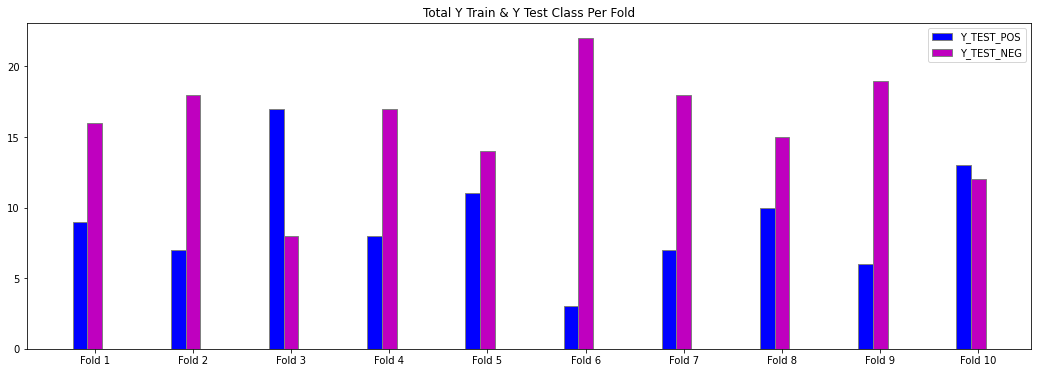

In [26]:
# PLot nilai Y test per fold

fig = plt.subplots(figsize=(18,6))
barWidth = 0.15
Y_TEST_POS = [sum(p == 1 for p in y_test_data[0]), sum(p == 1 for p in y_test_data[1]), sum(p == 1 for p in y_test_data[2]), sum(p == 1 for p in y_test_data[3]), sum(p == 1 for p in y_test_data[4]), sum(p == 1 for p in y_test_data[5]), sum(p == 1 for p in y_test_data[6]), sum(p == 1 for p in y_test_data[7]), sum(p == 1 for p in y_test_data[8]), sum(p == 1 for p in y_test_data[9])]
Y_TEST_NEG = [sum(p == 0 for p in y_test_data[0]), sum(p == 0 for p in y_test_data[1]), sum(p == 0 for p in y_test_data[2]), sum(p == 0 for p in y_test_data[3]), sum(p == 0 for p in y_test_data[4]), sum(p == 0 for p in y_test_data[5]), sum(p == 0 for p in y_test_data[6]), sum(p == 0 for p in y_test_data[7]), sum(p == 0 for p in y_test_data[8]), sum(p == 0 for p in y_test_data[9])]

br1 = np.arange(len(Y_TEST_POS))
br2 = [x + barWidth for x in br1]

plt.title("Total Y Train & Y Test Class Per Fold")
plt.bar(br1, Y_TEST_POS, color ='b', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_POS')
plt.bar(br2, Y_TEST_NEG, color ='m', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_NEG')

plt.xticks([r + barWidth for r in range(len(Y_TEST_POS))],
        ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Fold 6", "Fold 7", "Fold 8", "Fold 9", "Fold 10"])
 
plt.legend()
plt.show()

In [27]:
# Parameter SVM

c_data = 15
max_iteration = 50000
tolerance = 0.01
np.random.seed(10)

Accuration:  76.0 %
Precission:  100.0 %
Recall:  33.33333333333333 %
F1 Score:  50.0 %


Text(69.0, 0.5, 'Truth')

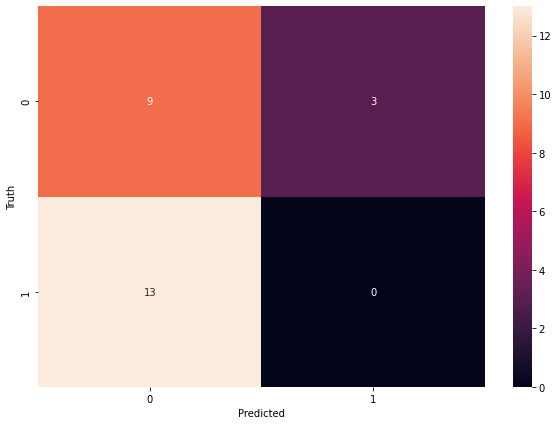

In [28]:
# Proses training FOLD-1

model_1 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-1
model_1 = model_1.fit(x_train_data[0], y_train_data[0])

prediction_1 = model_1.predict(x_test_data[0])
false_1 = (prediction_1 != y_test_data[0]).sum()
true_1 = (prediction_1 == y_test_data[0]).sum()
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test_data[0], prediction_1).ravel()
precision_score_1 = tp_1 / (tp_1 + fp_1)
recall_score_1 = tp_1 / (tp_1 + fn_1)
f1_score_1 = 2 * (recall_score_1 * precision_score_1) / (recall_score_1 + precision_score_1)

# Hasil Akurasi
print("Accuration: ", true_1 / (true_1 + false_1) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_1 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_1 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_1 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_1 = confusion_matrix(y_test, prediction_1)
plt.figure(figsize=(10,7))
sn.heatmap(cm_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  80.0 %
Precission:  62.5 %
Recall:  71.42857142857143 %
F1 Score:  66.66666666666666 %


Text(69.0, 0.5, 'Truth')

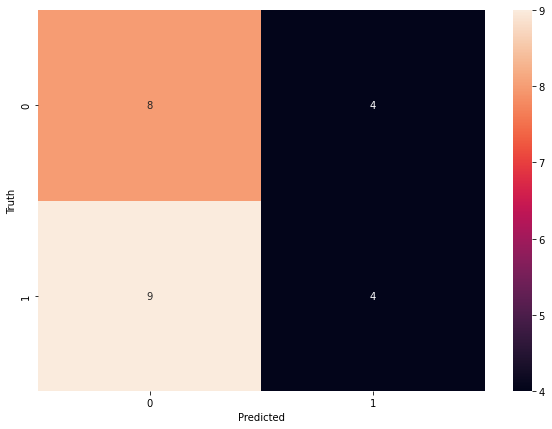

In [29]:
# Proses training FOLD-2

model_2 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-2
model_2 = model_2.fit(x_train_data[1], y_train_data[1])

prediction_2 = model_2.predict(x_test_data[1])
false_2 = (prediction_2 != y_test_data[1]).sum()
true_2 = (prediction_2 == y_test_data[1]).sum()
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test_data[1], prediction_2).ravel()
precision_score_2 = tp_2 / (tp_2 + fp_2)
recall_score_2 = tp_2 / (tp_2 + fn_2)
f1_score_2 = 2 * (recall_score_2 * precision_score_2) / (recall_score_2 + precision_score_2)

# Hasil Akurasi
print("Accuration: ", true_2 / (true_2 + false_2) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_2 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_2 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_2 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_2 = confusion_matrix(y_test, prediction_2)
plt.figure(figsize=(10,7))
sn.heatmap(cm_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  60.0 %
Precission:  88.88888888888889 %
Recall:  47.05882352941176 %
F1 Score:  61.53846153846153 %


Text(69.0, 0.5, 'Truth')

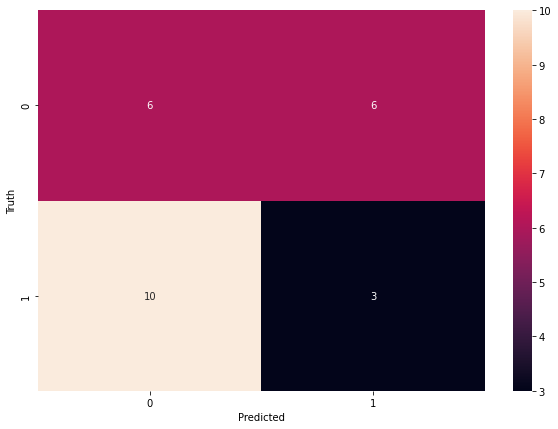

In [30]:
# Proses training FOLD-3

model_3 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-3
model_3 = model_3.fit(x_train_data[2], y_train_data[2])

prediction_3 = model_3.predict(x_test_data[2])
false_3 = (prediction_3 != y_test_data[2]).sum()
true_3 = (prediction_3 == y_test_data[2]).sum()
tn_3, fp_3, fn_3, tp_3 = confusion_matrix(y_test_data[2], prediction_3).ravel()
precision_score_3 = tp_3 / (tp_3 + fp_3)
recall_score_3 = tp_3 / (tp_3 + fn_3)
f1_score_3 = 2 * (recall_score_3 * precision_score_3) / (recall_score_3 + precision_score_3)

# Hasil Akurasi
print("Accuration: ", true_3 / (true_3 + false_3) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_3 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_3 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_3 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_3 = confusion_matrix(y_test, prediction_3)
plt.figure(figsize=(10,7))
sn.heatmap(cm_3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  76.0 %
Precission:  66.66666666666666 %
Recall:  50.0 %
F1 Score:  57.14285714285715 %


Text(69.0, 0.5, 'Truth')

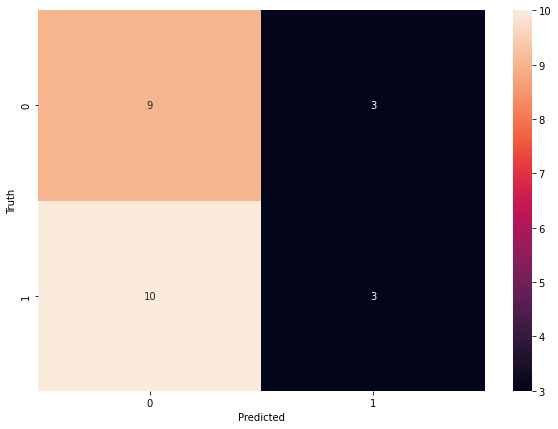

In [31]:
# Proses training FOLD-4

model_4 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-4
model_4 = model_4.fit(x_train_data[3], y_train_data[3])

prediction_4 = model_4.predict(x_test_data[3])
false_4 = (prediction_4 != y_test_data[3]).sum()
true_4 = (prediction_4 == y_test_data[3]).sum()
tn_4, fp_4, fn_4, tp_4 = confusion_matrix(y_test_data[3], prediction_4).ravel()
precision_score_4 = tp_4 / (tp_4 + fp_4)
recall_score_4 = tp_4 / (tp_4 + fn_4)
f1_score_4 = 2 * (recall_score_4 * precision_score_4) / (recall_score_4 + precision_score_4)

# Hasil Akurasi
print("Accuration: ", true_4 / (true_4 + false_4) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_4 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_4 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_4 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_4 = confusion_matrix(y_test, prediction_4)
plt.figure(figsize=(10,7))
sn.heatmap(cm_4, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  80.0 %
Precission:  87.5 %
Recall:  63.63636363636363 %
F1 Score:  73.68421052631578 %


Text(69.0, 0.5, 'Truth')

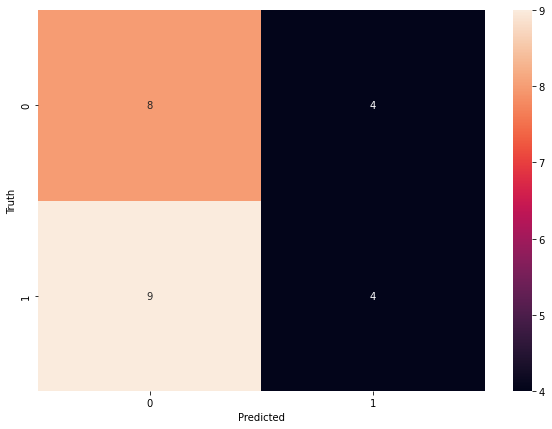

In [32]:
# Proses training FOLD-5

model_5 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-5
model_5 = model_5.fit(x_train_data[4], y_train_data[4])

prediction_5 = model_5.predict(x_test_data[4])
false_5 = (prediction_5 != y_test_data[4]).sum()
true_5 = (prediction_5 == y_test_data[4]).sum()
tn_5, fp_5, fn_5, tp_5 = confusion_matrix(y_test_data[4], prediction_5).ravel()
precision_score_5 = tp_5 / (tp_5 + fp_5)
recall_score_5 = tp_5 / (tp_5 + fn_5)
f1_score_5 = 2 * (recall_score_5 * precision_score_5) / (recall_score_5 + precision_score_5)

# Hasil Akurasi
print("Accuration: ", true_5 / (true_5 + false_5) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_5 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_5 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_5 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_5 = confusion_matrix(y_test, prediction_5)
plt.figure(figsize=(10,7))
sn.heatmap(cm_5, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  84.0 %
Precission:  33.33333333333333 %
Recall:  33.33333333333333 %
F1 Score:  33.33333333333333 %


Text(69.0, 0.5, 'Truth')

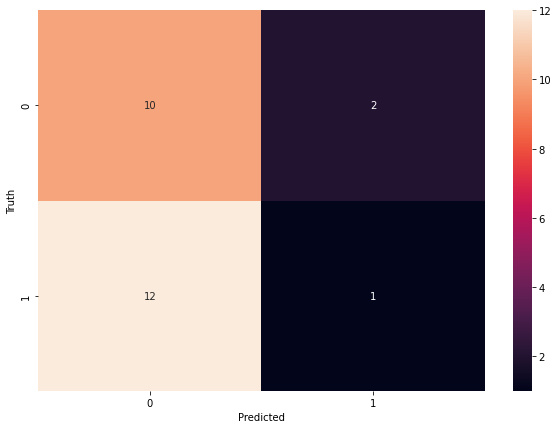

In [33]:
# Proses training FOLD-5

model_6 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-5
model_6 = model_6.fit(x_train_data[5], y_train_data[5])

prediction_6 = model_6.predict(x_test_data[5])
false_6 = (prediction_6 != y_test_data[5]).sum()
true_6 = (prediction_6 == y_test_data[5]).sum()
tn_6, fp_6, fn_6, tp_6 = confusion_matrix(y_test_data[5], prediction_6).ravel()
precision_score_6 = tp_6 / (tp_6 + fp_6)
recall_score_6 = tp_6 / (tp_6 + fn_6)
f1_score_6 = 2 * (recall_score_6 * precision_score_6) / (recall_score_6 + precision_score_6)

# Hasil Akurasi
print("Accuration: ", true_6 / (true_6 + false_6) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_6 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_6 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_6 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_6 = confusion_matrix(y_test, prediction_6)
plt.figure(figsize=(10,7))
sn.heatmap(cm_6, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  76.0 %
Precission:  57.14285714285714 %
Recall:  57.14285714285714 %
F1 Score:  57.14285714285714 %


Text(69.0, 0.5, 'Truth')

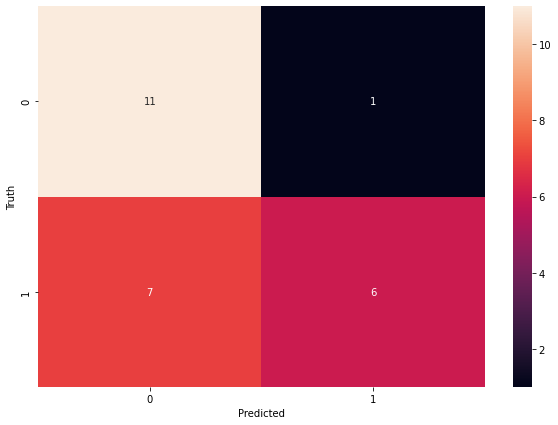

In [34]:
# Proses training FOLD-5

model_7 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-5
model_7 = model_7.fit(x_train_data[6], y_train_data[6])

prediction_7 = model_7.predict(x_test_data[6])
false_7 = (prediction_7 != y_test_data[6]).sum()
true_7 = (prediction_7 == y_test_data[6]).sum()
tn_7, fp_7, fn_7, tp_7 = confusion_matrix(y_test_data[6], prediction_7).ravel()
precision_score_7 = tp_7 / (tp_7 + fp_7)
recall_score_7 = tp_7 / (tp_7 + fn_7)
f1_score_7 = 2 * (recall_score_7 * precision_score_7) / (recall_score_7 + precision_score_7)

# Hasil Akurasi
print("Accuration: ", true_7 / (true_7 + false_7) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_7 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_7 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_7 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_7 = confusion_matrix(y_test, prediction_7)
plt.figure(figsize=(10,7))
sn.heatmap(cm_7, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  72.0 %
Precission:  71.42857142857143 %
Recall:  50.0 %
F1 Score:  58.823529411764696 %


Text(69.0, 0.5, 'Truth')

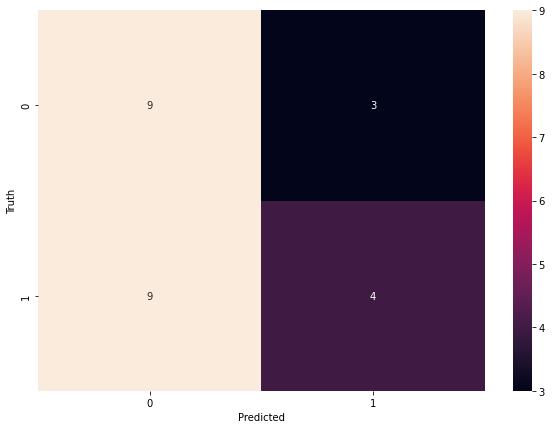

In [35]:
# Proses training FOLD-5

model_8 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-5
model_8 = model_8.fit(x_train_data[7], y_train_data[7])

prediction_8 = model_8.predict(x_test_data[7])
false_8 = (prediction_8 != y_test_data[7]).sum()
true_8 = (prediction_8 == y_test_data[7]).sum()
tn_8, fp_8, fn_8, tp_8 = confusion_matrix(y_test_data[7], prediction_8).ravel()
precision_score_8 = tp_8 / (tp_8 + fp_8)
recall_score_8 = tp_8 / (tp_8 + fn_8)
f1_score_8 = 2 * (recall_score_8 * precision_score_8) / (recall_score_8 + precision_score_8)

# Hasil Akurasi
print("Accuration: ", true_8 / (true_8 + false_8) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_8 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_8 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_8 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_8 = confusion_matrix(y_test, prediction_8)
plt.figure(figsize=(10,7))
sn.heatmap(cm_8, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  92.0 %
Precission:  83.33333333333334 %
Recall:  83.33333333333334 %
F1 Score:  83.33333333333334 %


Text(69.0, 0.5, 'Truth')

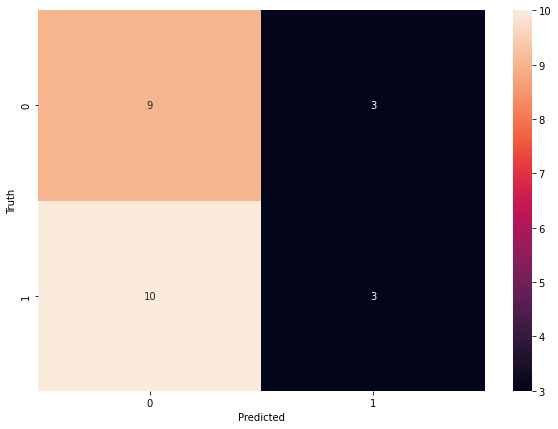

In [36]:
# Proses training FOLD-5

model_9 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-5
model_9 = model_9.fit(x_train_data[8], y_train_data[8])

prediction_9 = model_9.predict(x_test_data[8])
false_9 = (prediction_9 != y_test_data[8]).sum()
true_9 = (prediction_9 == y_test_data[8]).sum()
tn_9, fp_9, fn_9, tp_9 = confusion_matrix(y_test_data[8], prediction_9).ravel()
precision_score_9 = tp_9 / (tp_9 + fp_9)
recall_score_9 = tp_9 / (tp_9 + fn_9)
f1_score_9 = 2 * (recall_score_9 * precision_score_9) / (recall_score_9 + precision_score_9)

# Hasil Akurasi
print("Accuration: ", true_9 / (true_9 + false_9) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_9 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_9 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_9 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_9 = confusion_matrix(y_test, prediction_9)
plt.figure(figsize=(10,7))
sn.heatmap(cm_9, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  56.00000000000001 %
Precission:  75.0 %
Recall:  23.076923076923077 %
F1 Score:  35.29411764705882 %


Text(69.0, 0.5, 'Truth')

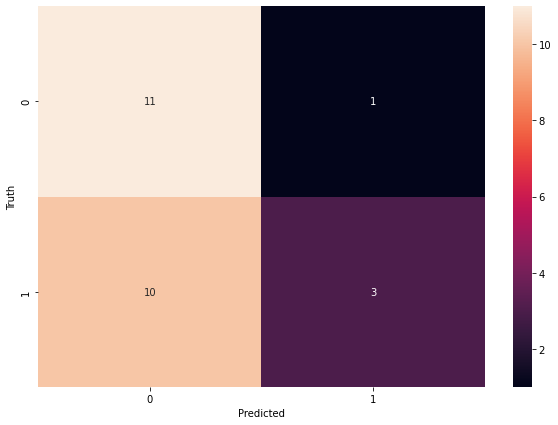

In [37]:
# Proses training FOLD-5

model_10 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-5
model_10 = model_10.fit(x_train_data[9], y_train_data[9])

prediction_10 = model_10.predict(x_test_data[9])
false_10 = (prediction_10 != y_test_data[9]).sum()
true_10 = (prediction_10 == y_test_data[9]).sum()
tn_10, fp_10, fn_10, tp_10 = confusion_matrix(y_test_data[9], prediction_10).ravel()
precision_score_10 = tp_10 / (tp_10 + fp_10)
recall_score_10 = tp_10 / (tp_10 + fn_10)
f1_score_10 = 2 * (recall_score_10 * precision_score_10) / (recall_score_10 + precision_score_10)

# Hasil Akurasi
print("Accuration: ", true_10 / (true_10 + false_10) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_10 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_10 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_10 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_10 = confusion_matrix(y_test, prediction_10)
plt.figure(figsize=(10,7))
sn.heatmap(cm_10, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

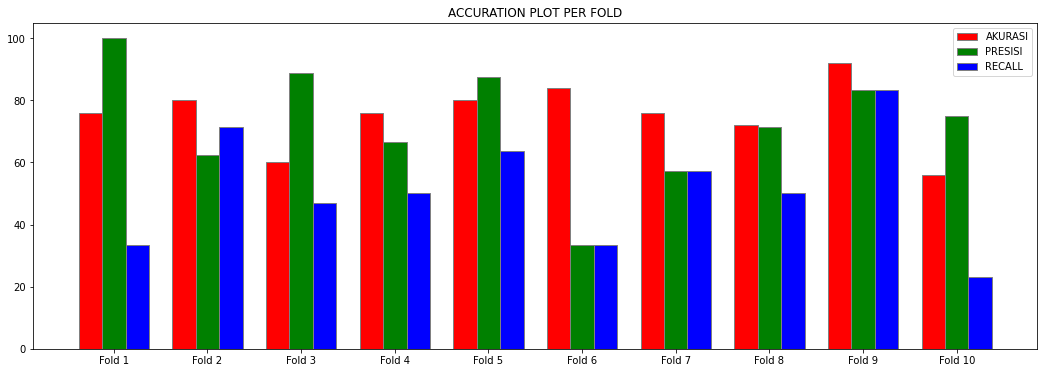

In [38]:
fig = plt.subplots(figsize=(18,6))
barWidth = 0.25
ACCURACY = [(true_1 / (true_1 + false_1) * 100), (true_2 / (true_2 + false_2) * 100), (true_3 / (true_3 + false_3) * 100), (true_4 / (true_4 + false_4) * 100), (true_5 / (true_5 + false_5) * 100), (true_6 / (true_6 + false_6) * 100), (true_7 / (true_7 + false_7) * 100), (true_8 / (true_8 + false_8) * 100), (true_9 / (true_9 + false_9) * 100), (true_10 / (true_10 + false_10) * 100)]
PRECISION = [precision_score_1 * 100, precision_score_2 * 100, precision_score_3 * 100, precision_score_4 * 100, precision_score_5 * 100, precision_score_6 * 100, precision_score_7 * 100, precision_score_8 * 100, precision_score_9 * 100, precision_score_10 * 100]
RECALL = [recall_score_1 * 100, recall_score_2 * 100, recall_score_3 * 100, recall_score_4 * 100, recall_score_5 * 100, recall_score_6 * 100, recall_score_7 * 100, recall_score_8 * 100, recall_score_9 * 100, recall_score_10 * 100]
 
br1 = np.arange(len(ACCURACY))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.title("ACCURATION PLOT PER FOLD")
plt.bar(br1, ACCURACY, color ='r', width = barWidth,
        edgecolor ='grey', label ='AKURASI')
plt.bar(br2, PRECISION, color ='g', width = barWidth,
        edgecolor ='grey', label ='PRESISI')
plt.bar(br3, RECALL, color ='b', width = barWidth,
        edgecolor ='grey', label ='RECALL')

plt.xticks([r + barWidth for r in range(len(ACCURACY))],
    ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Fold 6", "Fold 7", "Fold 8", "Fold 9", "Fold 10"])
 
plt.legend()
plt.show()

In [39]:
avg = (true_1 / (true_1 + false_1) * 100) + (true_2 / (true_2 + false_2) * 100) + (true_3 / (true_3 + false_3) * 100) + (true_4 / (true_4 + false_4) * 100) + (true_5 / (true_5 + false_5) * 100) + (true_6 / (true_6 + false_6) * 100) + (true_7 / (true_7 + false_7) * 100) + (true_8 / (true_8 + false_8) * 100) + (true_9 / (true_9 + false_9) * 100) + (true_10 / (true_10 + false_10) * 100)
avg = avg/10
avg

75.2